In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random 
import os
import tensorflow as tf
import sklearn
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, SpatialDropout2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, recall_score, precision_score
import keras_tuner as kt
import seaborn as sns

2024-12-17 06:19:00.520101: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-17 06:19:00.520155: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-17 06:19:00.521358: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-17 06:19:00.527491: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-17 06:19:01.461976: W tensorflow/compiler/tf2

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2024-12-17 06:19:04.893909: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-17 06:19:04.933823: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-17 06:19:04.935265: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
major_class = pd.read_csv('major_class.csv')

In [4]:
minor_class = pd.read_csv("minor_class.csv")

In [7]:
disease_class = pd.concat([major_class, minor_class], axis=0, ignore_index=True)

In [8]:
disease_class['Label'].unique()

array([2, 3, 6, 7, 0, 1, 4, 5])

In [9]:
disease_class

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_49143,Pixel_49144,Pixel_49145,Pixel_49146,Pixel_49147,Pixel_49148,Pixel_49149,Pixel_49150,Pixel_49151,Label
0,0,2,1,0,2,1,0,2,0,0,...,0,2,0,0,2,0,0,2,1,2
1,66,51,39,74,56,42,80,61,45,87,...,42,32,28,32,24,21,23,17,15,2
2,225,136,152,224,135,152,227,136,152,228,...,212,140,140,211,141,138,210,137,135,2
3,219,130,128,222,132,133,223,134,136,223,...,191,99,92,190,99,92,188,97,92,2
4,125,162,203,124,162,201,121,159,198,121,...,124,159,197,124,159,197,124,159,197,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,174,156,163,175,157,162,176,157,163,178,...,145,130,137,139,121,128,137,115,118,5
13196,146,149,159,146,149,159,146,149,160,146,...,135,140,149,133,139,147,134,139,148,5
13197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13198,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


In [10]:
disease_class_encoded = pd.get_dummies(disease_class, columns=['Label'], prefix='Label')

disease_class_encoded.head()

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_49150,Pixel_49151,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7
0,0,2,1,0,2,1,0,2,0,0,...,2,1,False,False,True,False,False,False,False,False
1,66,51,39,74,56,42,80,61,45,87,...,17,15,False,False,True,False,False,False,False,False
2,225,136,152,224,135,152,227,136,152,228,...,137,135,False,False,True,False,False,False,False,False
3,219,130,128,222,132,133,223,134,136,223,...,97,92,False,False,True,False,False,False,False,False
4,125,162,203,124,162,201,121,159,198,121,...,159,197,False,False,True,False,False,False,False,False


In [11]:
disease_class_encoded['Label'] = disease_class['Label']

In [38]:
major_encoded = disease_class_encoded[disease_class_encoded['Label'].isin(major_class['Label'].unique())]

In [40]:
major_encoded['Label'].unique()

array([2, 3, 6, 7])

In [41]:
major_encoded 

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_49151,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label
0,0,2,1,0,2,1,0,2,0,0,...,1,False,False,True,False,False,False,False,False,2
1,66,51,39,74,56,42,80,61,45,87,...,15,False,False,True,False,False,False,False,False,2
2,225,136,152,224,135,152,227,136,152,228,...,135,False,False,True,False,False,False,False,False,2
3,219,130,128,222,132,133,223,134,136,223,...,92,False,False,True,False,False,False,False,False,2
4,125,162,203,124,162,201,121,159,198,121,...,197,False,False,True,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3,3,3,3,3,3,4,4,4,6,...,46,False,False,False,False,False,False,False,True,7
11996,65,53,38,68,51,37,70,50,33,75,...,43,False,False,False,False,False,False,False,True,7
11997,229,206,198,227,207,197,228,208,197,228,...,182,False,False,False,False,False,False,False,True,7
11998,221,149,168,220,151,170,220,156,174,220,...,133,False,False,False,False,False,False,False,True,7


In [44]:
major_encoded = major_encoded.drop(columns = ['Label'])

In [45]:
major_encoded

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_49150,Pixel_49151,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7
0,0,2,1,0,2,1,0,2,0,0,...,2,1,False,False,True,False,False,False,False,False
1,66,51,39,74,56,42,80,61,45,87,...,17,15,False,False,True,False,False,False,False,False
2,225,136,152,224,135,152,227,136,152,228,...,137,135,False,False,True,False,False,False,False,False
3,219,130,128,222,132,133,223,134,136,223,...,97,92,False,False,True,False,False,False,False,False
4,125,162,203,124,162,201,121,159,198,121,...,159,197,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,3,3,3,3,3,3,4,4,4,6,...,50,46,False,False,False,False,False,False,False,True
11996,65,53,38,68,51,37,70,50,33,75,...,59,43,False,False,False,False,False,False,False,True
11997,229,206,198,227,207,197,228,208,197,228,...,189,182,False,False,False,False,False,False,False,True
11998,221,149,168,220,151,170,220,156,174,220,...,130,133,False,False,False,False,False,False,False,True


In [203]:
X = major_encoded.drop(columns=['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7']).values
X = X.reshape(-1, 128, 128, 3) / 255.0

y = major_encoded[['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7']].values

In [204]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (9600, 128, 128, 3)
Shape of X_val: (2400, 128, 128, 3)
Shape of y_train: (9600, 8)
Shape of y_val: (2400, 8)


In [48]:
y_train.shape[1]

8

In [ ]:
def model_builder(hp):
    model = Sequential()

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
    model.add(Conv2D(
        filters=hp.Int('filters_1',min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        padding='same',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    


    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    
    model.add(Dense(
        units=hp.Int('dense_1', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )


    return model

In [ ]:
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy',
                     max_epochs=20,
                     factor = 5,
                     directory = 'trials',
                     project_name = 'one')

In [54]:
stop_early = EarlyStopping(monitor = 'val_loss', patience = 5)

In [55]:
tuner.search(
    X_train,
    y_train, 
    validation_data=(X_val, y_val),  
    epochs=50,
    callbacks=[stop_early],
    batch_size = 64
)

Trial 13 Complete [00h 01m 22s]
val_accuracy: 0.5262500047683716

Best val_accuracy So Far: 0.7137500047683716
Total elapsed time: 00h 12m 38s


In [109]:
best_hp = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters:", best_hp.values)

Best Hyperparameters: {'learning_rate': 0.0001, 'filters_1': 32, 'kernel_size_1': 5, 'use_spatial_dropout': False, 'filters_2': 160, 'kernel_size_2': 5, 'filters_3': 256, 'kernel_size_3': 5, 'filters_4': 96, 'kernel_size_4': 3, 'use_flatten': True, 'dense_1': 192, 'dropout_rate': 0.30000000000000004, 'spatial_dropout_rate': 0.2, 'tuner/epochs': 20, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0007'}


In [110]:
def model_builder(hp):
    model = Sequential()

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
    model.add(Conv2D(
        filters=hp.Int('filters_1',min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        padding='same',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(SpatialDropout2D(0.2))
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    


    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(
        units=hp.Int('dense_1', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )


    return model

In [111]:
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy',
                     max_epochs=20,
                     factor = 5,
                     directory = 'trials',
                     project_name = 'second')

Reloading Tuner from trials/second/tuner0.json


In [58]:
tuner.search(
    X_train,
    y_train, 
    validation_data=(X_val, y_val),  
    epochs=50,
    callbacks=[stop_early],
    batch_size = 64
)

Trial 13 Complete [00h 02m 45s]
val_accuracy: 0.6370833516120911

Best val_accuracy So Far: 0.6587499976158142
Total elapsed time: 00h 17m 04s


In [112]:
best_hp1 = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters:", best_hp1.values)

Best Hyperparameters: {'learning_rate': 0.0001, 'filters_1': 128, 'kernel_size_1': 3, 'filters_2': 192, 'kernel_size_2': 5, 'filters_3': 160, 'kernel_size_3': 5, 'filters_4': 128, 'kernel_size_4': 5, 'dense_1': 32, 'dropout_rate': 0.2, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [113]:
def model_builder(hp):
    model = Sequential()

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    #Block 1
    model.add(Conv2D(
        filters=hp.Int('filters_1',min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        padding='same',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())

    if hp.Boolean('use_spatial_dropout'):
        model.add(SpatialDropout2D(rate=hp.Float('spatial_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(MaxPooling2D(pool_size=2))
    
    #Block 2
    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())

    if hp.Boolean('use_spatial_dropout'):
        model.add(SpatialDropout2D(rate=hp.Float('spatial_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(MaxPooling2D(pool_size=2))
    

    #Block 3
    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())

    if hp.Boolean('use_spatial_dropout'):
        model.add(SpatialDropout2D(rate=hp.Float('spatial_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(MaxPooling2D(pool_size=2))
    
    #Block 4
    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())

    if hp.Boolean('use_spatial_dropout'):
        model.add(SpatialDropout2D(rate=hp.Float('spatial_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(MaxPooling2D(pool_size=2))

    #Block 5
    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())

    if hp.Boolean('use_spatial_dropout'):
        model.add(SpatialDropout2D(rate=hp.Float('spatial_dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
        
    model.add(MaxPooling2D(pool_size=2))

    if hp.Boolean('use_flatten'):
        model.add(Flatten())
    else:
        model.add(GlobalAveragePooling2D())
    
    
    model.add(Dense(
        units=hp.Int('dense_1', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )


    return model

In [114]:
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy',
                     max_epochs=20,
                     factor = 5,
                     directory = 'trials',
                     project_name = 'three')

Reloading Tuner from trials/three/tuner0.json


In [61]:
tuner.search(
    X_train,
    y_train, 
    validation_data=(X_val, y_val),  
    epochs=50,
    callbacks=[stop_early],
    batch_size = 64
)

Trial 13 Complete [00h 01m 08s]
val_accuracy: 0.6195833086967468

Best val_accuracy So Far: 0.7212499976158142
Total elapsed time: 00h 10m 04s


In [115]:
best_hp2 = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters:", best_hp2.values)

Best Hyperparameters: {'learning_rate': 0.0001, 'filters_1': 32, 'kernel_size_1': 5, 'use_spatial_dropout': False, 'filters_2': 160, 'kernel_size_2': 5, 'filters_3': 256, 'kernel_size_3': 5, 'filters_4': 96, 'kernel_size_4': 3, 'use_flatten': True, 'dense_1': 192, 'dropout_rate': 0.30000000000000004, 'spatial_dropout_rate': 0.2, 'tuner/epochs': 20, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0007'}


In [116]:
def model_builder(hp):
    model = Sequential()

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
    model.add(Conv2D(
        filters=hp.Int('filters_1',min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        padding='same',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    


    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(
        filters=hp.Int('filters_5', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_5', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(
        filters=hp.Int('filters_6', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_6', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(
        filters=hp.Int('filters_7', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_7', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    
    model.add(Dense(
        units=hp.Int('dense_1', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )


    return model

In [117]:
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy',
                     max_epochs=20,
                     factor = 5,
                     directory = 'trials',
                     project_name = 'four')

Reloading Tuner from trials/four/tuner0.json


In [64]:
tuner.search(
    X_train,
    y_train, 
    validation_data=(X_val, y_val),  
    epochs=50,
    callbacks=[stop_early],
    batch_size = 64
)

Trial 13 Complete [00h 00m 55s]
val_accuracy: 0.6654166579246521

Best val_accuracy So Far: 0.6741666793823242
Total elapsed time: 00h 10m 48s


In [118]:
best_hp3 = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters:", best_hp3.values)

Best Hyperparameters: {'learning_rate': 0.0001, 'filters_1': 224, 'kernel_size_1': 3, 'filters_2': 64, 'kernel_size_2': 5, 'filters_3': 160, 'kernel_size_3': 5, 'filters_4': 64, 'kernel_size_4': 5, 'filters_5': 224, 'kernel_size_5': 3, 'filters_6': 192, 'kernel_size_6': 5, 'filters_7': 192, 'kernel_size_7': 3, 'dense_1': 192, 'dropout_rate': 0.4, 'tuner/epochs': 20, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0001'}


In [119]:
def model_builder(hp):
    model = Sequential()

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
    model.add(Conv2D(
        filters=hp.Int('filters_1',min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        padding='same',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    


    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    
    model.add(Dense(
        units=hp.Int('dense_1', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )


    return model

In [120]:
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy',
                     max_epochs=20,
                     factor = 5,
                     directory = 'trials',
                     project_name = 'five')

Reloading Tuner from trials/five/tuner0.json


In [67]:
tuner.search(
    X_train,
    y_train, 
    validation_data=(X_val, y_val),  
    epochs=50,
    callbacks=[stop_early],
    batch_size = 64
)

Trial 13 Complete [00h 02m 20s]
val_accuracy: 0.5554166436195374

Best val_accuracy So Far: 0.7099999785423279
Total elapsed time: 00h 09m 55s


In [121]:
best_hp4 = tuner.get_best_hyperparameters()[0]
print("Best Hyperparameters:", best_hp4.values)

Best Hyperparameters: {'learning_rate': 0.0001, 'filters_1': 64, 'kernel_size_1': 3, 'filters_2': 224, 'kernel_size_2': 3, 'filters_3': 192, 'kernel_size_3': 3, 'filters_4': 192, 'kernel_size_4': 3, 'dense_1': 224, 'dropout_rate': 0.2, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [122]:
model = tuner.hypermodel.build(best_hp2)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      2432      
                                                                 
 batch_normalization_33 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 160)       128160    
                                                                 
 batch_normalization_34 (Ba  (None, 64, 64, 160)       640       
 tchNormalization)                                               
                                                      

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=20,         
    restore_best_weights=True,  
    verbose=1
)

In [123]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=200,         
    batch_size=32,
    callbacks=[early_stopping],  
    verbose=1
)

Epoch 1/200
300/300 [==============================] - 7s 17ms/step - loss: 1.2819 - accuracy: 0.4809 - val_loss: 4.4173 - val_accuracy: 0.1054
Epoch 2/200
300/300 [==============================] - 4s 14ms/step - loss: 1.0309 - accuracy: 0.5678 - val_loss: 1.0530 - val_accuracy: 0.5713
Epoch 3/200
300/300 [==============================] - 4s 14ms/step - loss: 0.9590 - accuracy: 0.6001 - val_loss: 1.0117 - val_accuracy: 0.5667
Epoch 4/200
300/300 [==============================] - 4s 14ms/step - loss: 0.9032 - accuracy: 0.6280 - val_loss: 0.8696 - val_accuracy: 0.6321
Epoch 5/200
300/300 [==============================] - 4s 14ms/step - loss: 0.8447 - accuracy: 0.6469 - val_loss: 0.8403 - val_accuracy: 0.6550
Epoch 6/200
300/300 [==============================] - 4s 14ms/step - loss: 0.7990 - accuracy: 0.6717 - val_loss: 0.9122 - val_accuracy: 0.6171
Epoch 7/200
300/300 [==============================] - 4s 14ms/step - loss: 0.7406 - accuracy: 0.7022 - val_loss: 0.9332 - val_accuracy:

In [12]:
minor_encoded = disease_class_encoded[disease_class_encoded['Label'].isin(minor_class['Label'].unique())]

In [13]:
minor_encoded['Label'].unique()

array([0, 1, 4, 5])

In [14]:
minor_encoded = minor_encoded.drop(columns = ['Label'])

In [15]:
minor_encoded

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_49150,Pixel_49151,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7
12000,14,14,14,21,20,20,29,27,28,37,...,2,2,True,False,False,False,False,False,False,False
12001,211,174,187,213,171,181,211,168,173,212,...,147,136,True,False,False,False,False,False,False,False
12002,0,0,0,0,0,0,0,0,0,0,...,0,0,True,False,False,False,False,False,False,False
12003,0,0,0,0,0,0,0,0,0,0,...,0,0,True,False,False,False,False,False,False,False
12004,191,128,129,190,127,127,191,125,126,192,...,116,122,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13195,174,156,163,175,157,162,176,157,163,178,...,115,118,False,False,False,False,False,True,False,False
13196,146,149,159,146,149,159,146,149,160,146,...,139,148,False,False,False,False,False,True,False,False
13197,0,0,0,0,0,0,0,0,0,0,...,0,0,False,False,False,False,False,True,False,False
13198,1,1,1,1,1,1,1,1,1,1,...,1,1,False,False,False,False,False,True,False,False


In [136]:
X = minor_encoded.drop(columns=['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7']).values
X = X.reshape(-1, 128, 128, 3) / 255.0

y = minor_encoded[['Label_0', 'Label_1', 'Label_2', 'Label_3', 'Label_4', 'Label_5', 'Label_6', 'Label_7']].values

In [137]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (960, 128, 128, 3)
Shape of X_val: (240, 128, 128, 3)
Shape of y_train: (960, 8)
Shape of y_val: (240, 8)


In [138]:
def model_builder(hp):
    model = Sequential()

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
 
    model.add(Conv2D(
        filters=hp.Int('filters_1',min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_1', values=[3, 5]),
        activation='relu',
        padding='same',
        input_shape=(128, 128, 3)
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_2', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    


    model.add(Conv2D(
        filters=hp.Int('filters_3', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_3', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))
    

    model.add(Conv2D(
        filters=hp.Int('filters_4', min_value=32, max_value=256, step=32),
        kernel_size=hp.Choice('kernel_size_4', values=[3, 5]),
        activation='relu',
        padding='same'
    ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())
    
    model.add(Dense(
        units=hp.Int('dense_1', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(Dense(y_train.shape[1], activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss=CategoricalCrossentropy(),
        metrics=['accuracy']
    )


    return model

In [139]:
tuner = kt.Hyperband(model_builder, 
                     objective='val_accuracy',
                     max_epochs=20,
                     factor = 5,
                     directory = 'trials',
                     project_name = 'minor_one')

In [140]:
tuner.search(
    X_train,
    y_train, 
    validation_data=(X_val, y_val),  
    epochs=50,
    callbacks=[stop_early],
    batch_size = 64
)

Trial 13 Complete [00h 00m 07s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.5291666388511658
Total elapsed time: 00h 01m 56s


In [16]:
param_grid = {
    "kneighborsclassifier__n_neighbors": list(range(3,20)),  
    "kneighborsclassifier__metric": ["euclidean"]
}

pipeline = make_pipeline(
    KNeighborsClassifier()  
)

In [17]:
grid_search = GridSearchCV(pipeline,
                           param_grid=param_grid,
                           scoring="accuracy",
                           cv = 5)

In [18]:
minor_class

,Pixel_0,Pixel_1,Pixel_2,Pixel_3,Pixel_4,Pixel_5,Pixel_6,Pixel_7,Pixel_8,Pixel_9,...,Pixel_49143,Pixel_49144,Pixel_49145,Pixel_49146,Pixel_49147,Pixel_49148,Pixel_49149,Pixel_49150,Pixel_49151,Label
0,14,14,14,21,20,20,29,27,28,37,...,5,5,5,3,3,3,2,2,2,0
1,211,174,187,213,171,181,211,168,173,212,...,213,158,160,209,154,152,209,147,136,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,191,128,129,190,127,127,191,125,126,192,...,177,112,121,176,114,121,177,116,122,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,174,156,163,175,157,162,176,157,163,178,...,145,130,137,139,121,128,137,115,118,5
1196,146,149,159,146,149,159,146,149,160,146,...,135,140,149,133,139,147,134,139,148,5
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1198,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,5


In [19]:
X_train = minor_class.drop(columns=['Label']) / 255.0

y_train = minor_class['Label']

In [186]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__metric': ['euclidean'],
                         'kneighborsclassifier__n_neighbors': [3, 4, 5, 6, 7, 8,
                                                               9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19]},
             scoring='accuracy')

In [187]:
df_cv_results = pd.DataFrame(grid_search.cv_results_)

df_cv_results.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kneighborsclassifier__metric,param_kneighborsclassifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.525119,0.042032,0.516725,0.050828,euclidean,3,"{'kneighborsclassifier__metric': 'euclidean', ...",0.587500,0.541667,0.591667,0.562500,0.604167,0.577500,0.022454,1
1,0.514837,0.019632,0.537191,0.046837,euclidean,4,"{'kneighborsclassifier__metric': 'euclidean', ...",0.550000,0.512500,0.583333,0.558333,0.554167,0.551667,0.022761,2
2,0.505778,0.012941,0.573037,0.060654,euclidean,5,"{'kneighborsclassifier__metric': 'euclidean', ...",0.545833,0.520833,0.545833,0.537500,0.525000,0.535000,0.010408,3
3,0.500086,0.008602,0.580765,0.044422,euclidean,6,"{'kneighborsclassifier__metric': 'euclidean', ...",0.520833,0.508333,0.545833,0.487500,0.516667,0.515833,0.018893,4
4,0.525557,0.032496,0.517701,0.070562,euclidean,7,"{'kneighborsclassifier__metric': 'euclidean', ...",0.520833,0.508333,0.516667,0.466667,0.508333,0.504167,0.019365,5
5,0.509276,0.024311,0.551924,0.047143,euclidean,8,"{'kneighborsclassifier__metric': 'euclidean', ...",0.512500,0.495833,0.520833,0.483333,0.470833,0.496667,0.018333,6
6,0.520593,0.023756,0.557292,0.042537,euclidean,9,"{'kneighborsclassifier__metric': 'euclidean', ...",0.529167,0.500000,0.487500,0.466667,0.479167,0.492500,0.021311,7
7,0.554745,0.025377,0.551612,0.089157,euclidean,10,"{'kneighborsclassifier__metric': 'euclidean', ...",0.500000,0.491667,0.508333,0.475000,0.483333,0.491667,0.011785,8
9,0.541967,0.008225,0.544567,0.057274,euclidean,12,"{'kneighborsclassifier__metric': 'euclidean', ...",0.487500,0.479167,0.541667,0.441667,0.495833,0.489167,0.032124,9
10,0.529429,0.028931,0.518326,0.047680,euclidean,13,"{'kneighborsclassifier__metric': 'euclidean', ...",0.520833,0.470833,0.504167,0.445833,0.470833,0.482500,0.026667,10


<Axes: xlabel='k', ylabel='accuracy'>

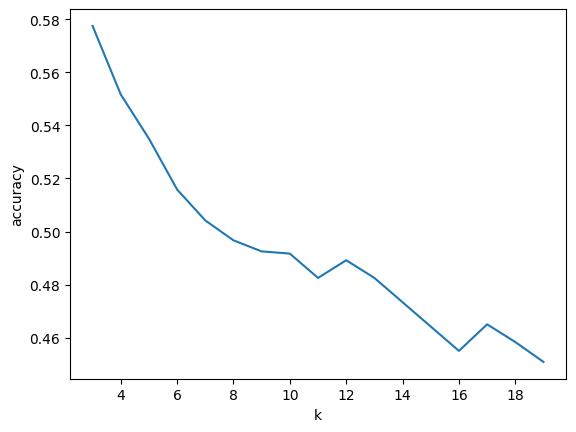

In [188]:
df_cv_results["param_kneighborsclassifier__n_neighbors"] = df_cv_results["param_kneighborsclassifier__n_neighbors"].astype(int)

df_cv_results.set_index("param_kneighborsclassifier__n_neighbors", inplace = True)

(df_cv_results["mean_test_score"]).plot.line(xlabel = "k", ylabel = "accuracy")

In [20]:
pipeline = make_pipeline(
    KNeighborsClassifier(n_neighbors=3, metric="euclidean"))
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=3))])

In [21]:
y_train_ = pipeline.predict(X_train)

In [22]:
minor_class['predicted'] = y_train_

misclassified_sample = minor_class[minor_class["Label"] != minor_class["predicted"]].groupby("predicted")

misclassified_sample

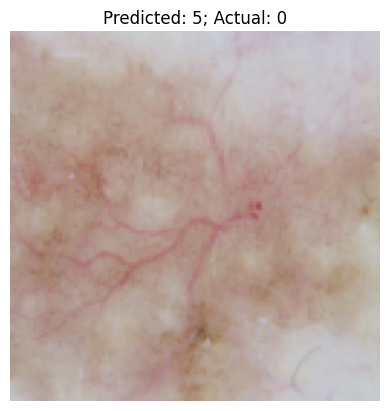

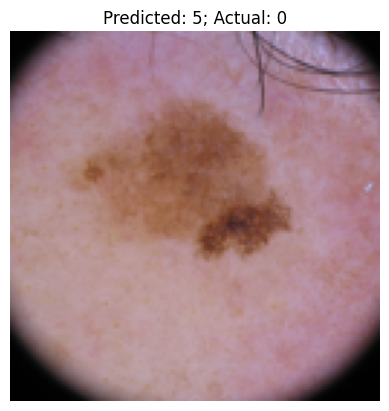

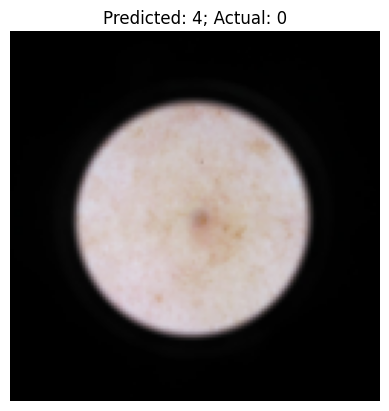

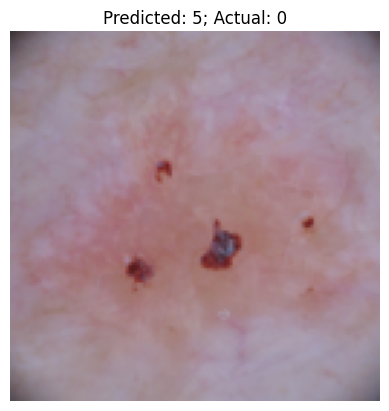

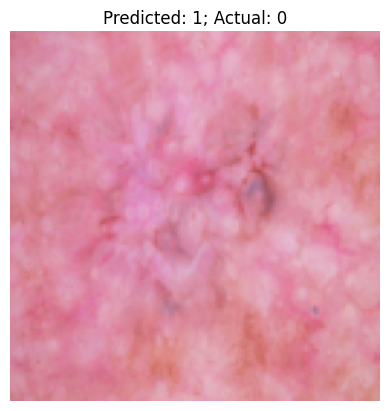

In [24]:
for i in range(5):
    misclassified_df = misclassified_sample.obj  
    if i >= len(misclassified_df):
        print(f"Only {len(misclassified_df)} misclassified samples available.")
        break

    row = misclassified_df.iloc[i]

    pixel_data = row.drop(labels=["Label", "predicted"])
    

    image = pixel_data.values.reshape(128, 128, 3)  
    actual_value = row["Label"]
    predicted_value = row["predicted"]

    plt.figure()
    plt.imshow(image, cmap="gray_r")
    plt.title(f"Predicted: {predicted_value}; Actual: {actual_value}")
    plt.axis("off")
    plt.show()

In [217]:
pd.crosstab(y_train, y_train_, margins=True)

col_0,0,1,4,5,All
Label,,,,,
0,233,14,18,35,300
1,6,278,3,13,300
4,64,18,179,39,300
5,10,13,3,274,300
All,313,323,203,361,1200


In [218]:
accuracy_minor = accuracy_score(y_train, y_train_)

accuracy_minor

0.8033333333333333

In [212]:
y_pred = model.predict(X)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y, axis=1)


accuracy_major = accuracy_score(y_true_classes, y_pred_classes)
accuracy_major

375/375 [==============================] - 2s 5ms/step


0.866

In [225]:
weighted_accuracy_disease = (accuracy_major * major_class.shape[0] + accuracy_minor * minor_class.shape[0]) / (major_class.shape[0] + minor_class.shape[0])

weighted_accuracy_disease

0.8603030303030303